In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
data = pd.read_csv("user_satisfaction_survey.csv")

In [3]:
X = data.drop(['Churn','ID'], axis=1) #Dropping the ID column also - its not needed
y = data['Churn']

In [4]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [5]:
def convert_yes_no(text):
    if 'Yes' in text:
        return 1
    else: return 0

In [6]:
X.Happy_with_instructors = X.Happy_with_instructors.apply(convert_yes_no)
X.Happy_with_class_duration = X.Happy_with_class_duration.apply(convert_yes_no)
X.Happy_with_class_timings = X.Happy_with_class_timings.apply(convert_yes_no)
X.Happy_with_class_size = X.Happy_with_class_size.apply(convert_yes_no)
X.Happy_with_facilities = X.Happy_with_facilities.apply(convert_yes_no)
X.Happy_with_price = X.Happy_with_price.apply(convert_yes_no)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
dtree = DecisionTreeClassifier()

In [9]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from sklearn import tree
import pydotplus

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [11]:
features = list(data.columns[1:8])
features

['Classes_per_week',
 'Happy_with_instructors',
 'Happy_with_class_duration',
 'Happy_with_class_timings',
 'Happy_with_class_size',
 'Happy_with_facilities',
 'Happy_with_price']

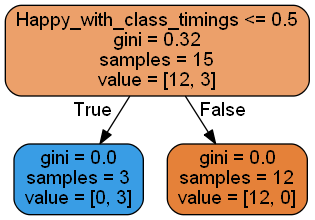

In [12]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [13]:
import joblib

In [14]:
joblib.dump(dtree,"dtree_classifier2")

['dtree_classifier2']

In [15]:
dt2 = joblib.load('dtree_classifier2')

In [32]:
sample2 = [2,'No', 'Yes', 'No', 'No', 'Yes', 'No']
sample2 = pd.DataFrame([sample2], columns = X.columns)
sample2

,Classes_per_week,Happy_with_instructors,Happy_with_class_duration,Happy_with_class_timings,Happy_with_class_size,Happy_with_facilities,Happy_with_price
0,2,No,Yes,No,No,Yes,No


In [43]:
cols = sample2.loc[:,"Happy_with_instructors":"Happy_with_price"]
cols 

,Happy_with_instructors,Happy_with_class_duration,Happy_with_class_timings,Happy_with_class_size,Happy_with_facilities,Happy_with_price
0,No,Yes,No,No,Yes,No
